In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import yfinance as yf # https://github.com/ranaroussi/yfinance
from tools import Tools

In [3]:
user_input = {
    'tickers':['AARTIIND','ADANIENT','CONCOR', 'CUMMINSIND','DEEPAKNTR','GUJGASLTD', 'ITC', 'TECHM', 'UPL'],
    'risk_free_rate': 0.08
}

In [4]:
tickers = user_input["tickers"]

In [5]:
start_time = datetime.now().timestamp()
yf_data = yf.download(
    tickers = [i+".NS" for i in tickers],
    start = datetime.now()-timedelta(days=365*10),
    end = datetime.now(),
    period='5y',
    interval='1d',
    group_by='ticker'
)
end_time = datetime.now().timestamp()
print(f"Time Take to fetch: {round(end_time-start_time)} seconds")

[*********************100%***********************]  9 of 9 completed
Time Take to fetch: 2 seconds


In [6]:
df = pd.DataFrame()
for i in tickers:
    df[i] = yf_data[i+".NS"]["Adj Close"]

In [7]:
fundamentals = pd.read_csv("datasets/fundamentals.csv", index_col="Ticker")

In [8]:
fundamentals["Market Capitalization"].sort_values(ascending=False).head(10)

Ticker
RELIANCE      1.211680e+13
TCS           8.260300e+12
HDFCBANK      6.034640e+12
HINDUNILVR    5.482320e+12
INFY          3.850280e+12
HDFC          3.132710e+12
BHARTIARTL    3.094370e+12
KOTAKBANK     2.628640e+12
ITC           2.384690e+12
ICICIBANK     2.291560e+12
Name: Market Capitalization, dtype: float64

In [9]:
df.head()

,AARTIIND,ADANIENT,CONCOR,CUMMINSIND,DEEPAKNTR,GUJGASLTD,ITC,TECHM,UPL
Date,,,,,,,,,
2010-07-26,15.419174,72.263397,180.001709,331.111786,NaN,NaN,77.770187,148.478317,101.245430
2010-07-27,15.345255,74.530609,178.574524,330.718781,NaN,NaN,78.168655,143.023529,105.168503
2010-07-28,15.300906,75.114883,178.238464,345.457886,NaN,NaN,78.964867,144.271652,102.656143
2010-07-29,15.138290,73.984436,177.889755,344.531891,NaN,NaN,79.671646,141.453293,101.104027
2010-07-30,15.256556,74.155884,177.521561,357.333344,NaN,NaN,79.324806,140.959656,103.983025


## Total Basket Cap 

In [10]:
market_cap = {}
total_basket_cap = 0
for i in tickers:
    market_cap[i] = fundamentals["Market Capitalization"].loc[i]
    total_basket_cap += fundamentals["Market Capitalization"].loc[i]

In [11]:
market_cap

{'AARTIIND': 157804000000.0,
 'ADANIENT': 166731000000.0,
 'CONCOR': 273207000000.0,
 'CUMMINSIND': 106625000000.0,
 'DEEPAKNTR': 72192800000.0,
 'GUJGASLTD': 201561000000.0,
 'ITC': 2384690000000.0,
 'TECHM': 579658000000.0,
 'UPL': 333391000000.0}

In [12]:
total_basket_cap

4275859800000.0

In [13]:
cap_weights = np.array([market_cap[i]/total_basket_cap for i in tickers])

In [14]:
cap_weights

array([0.03690579, 0.03899356, 0.06389522, 0.02493651, 0.01688381,
       0.04713929, 0.55771005, 0.13556525, 0.07797052])

In [15]:
# Individual Returns
returns = df.pct_change().dropna()

In [16]:
returns

,AARTIIND,ADANIENT,CONCOR,CUMMINSIND,DEEPAKNTR,GUJGASLTD,ITC,TECHM,UPL
Date,,,,,,,,,
2015-09-16,0.028183,0.016338,-0.056118,-0.007742,-0.018421,-0.050000,0.016086,0.006008,-0.029052
2015-09-18,0.054820,0.044207,0.020458,0.024875,0.038427,-0.049943,-0.012884,0.031885,0.006591
2015-09-21,0.073070,0.041050,-0.021254,0.001791,0.067126,-0.049996,-0.011793,0.010686,-0.021413
2015-09-22,0.012626,-0.033886,0.012580,-0.014215,0.010484,-0.038274,-0.006683,-0.017092,-0.017312
2015-09-23,-0.018804,0.020407,0.005156,-0.011699,0.015962,0.048808,0.012653,-0.003048,0.005295
...,...,...,...,...,...,...,...,...,...
2020-07-14,-0.011902,-0.040372,-0.005054,-0.004506,-0.004354,-0.032946,-0.008352,-0.002916,-0.003871
2020-07-15,-0.003924,-0.013356,0.018072,-0.016552,-0.027788,0.005344,0.014293,0.028414,0.000114
2020-07-16,-0.017619,0.007783,-0.002437,0.006838,-0.026520,-0.020266,-0.024409,-0.025841,-0.009370


In [17]:
inst = Tools(tickers, returns, 0.07)

In [18]:
cw_return = inst.portfolio_return(cap_weights)
cw_vol = inst.portfolio_vol(cap_weights)

In [19]:
optimal_weights = inst.calc_optimal_weights(50)

In [20]:
# Returns for each optimal weight
portfolio_returns = [inst.portfolio_return(w) for w in optimal_weights]
portfolio_volatility = [inst.portfolio_vol(w) for w in optimal_weights]

In [21]:
efficient_frontier_df = pd.DataFrame(
    {
        "PortfolioReturns": portfolio_returns,
        "PortfolioVolatility": portfolio_volatility
    }
)

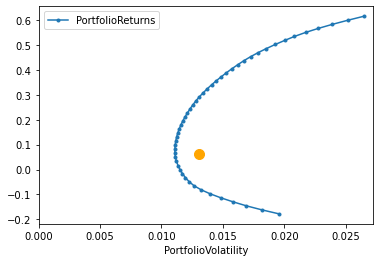

In [22]:
ax = efficient_frontier_df.plot.line(x="PortfolioVolatility", y="PortfolioReturns", style=".-")
ax.set_xlim(left = 0)
ax.plot([cw_vol], [cw_return], color='orange', marker='o', markersize=10)